# Приоритизация гипотез и анализ результатов А/В-теста

## План работы

1. Приоритизация гипотез:
- фреймворк ICE;
- фреймворк RICE.

2. Анализ А/В-теста.

Анализ:

- кумулятивной выручки по группам;
- кумулятивного среднего чека по группам;
- относительного изменения кумулятивного среднего чека группы B к группе A;
- кумулятивной конверсии по группам;
- относительного изменения кумулятивной конверсии группы B к группе A;
- количества заказов по пользователям;
- 95-го и 99-го перцентилей количества заказов на пользователя, определение границы для аномальных пользователей;
- стоимостей заказов;
- 95-го и 99-го перцентилей стоимости заказов, определение границы для аномальных заказов.

Расчет статистической значимости различий:

- в конверсии между группами по «сырым» данным;
- в среднем чеке заказа между группами по «сырым» данным;
- в конверсии между группами по «очищенным» данным;
- в среднем чеке заказа между группами по «очищенным» данным.

3. Выводы и решение по тесту

## Приоритизация гипотез

In [1]:
import pandas as pd
from scipy import stats as st
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# определяем переменные для датасетов
visitors, orders, hypothesis = (
    pd.read_csv('/datasets/visitors.csv'), # пользователи
    pd.read_csv('/datasets/orders.csv'), # покупки
    pd.read_csv('/datasets/hypothesis.csv') # гипотезы
)

In [3]:
pd.options.display.max_colwidth = 1
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


- `Hypothesis` — краткое описание гипотезы;
- `Reach` — охват пользователей по 10-балльной шкале;
- `Impact` — влияние на пользователей по 10-балльной шкале;
- `Confidence` — уверенность в гипотезе по 10-балльной шкале;
- `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. 
Чем больше значение `Efforts`, тем дороже проверка гипотезы.

In [4]:
# уберем заглавные буквы из названий столбцов
hypothesis.columns = hypothesis.columns.str.lower()

In [5]:
# посчитаем ICE
hypothesis['ice'] = round((hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts'], 2)
hypothesis[['hypothesis', 'ice']].sort_values(by='ice', ascending=False).head(9)

,hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


In [6]:
# посчитаем RICE
hypothesis['rice'] = (hypothesis['impact'] * hypothesis['confidence'] * hypothesis['reach']) / hypothesis['efforts']
hypothesis[['hypothesis', 'rice']].sort_values(by='rice', ascending=False).head(9)

,hypothesis,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


При приоритезировании с помощью фреймворка ICE учитывались показатели влияния на пользователей, уверенность в гипотезе и затрат ресурсов.

При такой оценке лидером стала девятая гипотеза, у которой высокие показатели Impact и Confidence и средний показатель по затратности. На втором месте оказалась первая гипотеза с максимальным Impact, Confidence немногим ниже, чем у предыдущей гипотезы, но при этом чуть более затратной.

При смене фреймворка учитываться стал также охват пользователей, поэтому на первое место вышла восьмая гипотеза с максимальным охватом, а второе место заняла гипотеза с довольно высокими Reach и Confidence, при этом с низким показателем Efforts. Первая гипотеза оказалась на третьем месте.

Таким образом, наиболее подходящей для тестирования оказывается гипотеза с индексом 7, также можно рассмотреть гипотезу с индексом 0.

## Анализ А/В-теста

### Предобработка данных

In [7]:
# функция для оценки необходимости предобработки данных
def describe(data, column):
    display(data)
    print('\033[1m' + 'Информация о датафрейме' + '\033[0m')
    print(data.info())
#     print('\033[1m' + 'Количество пропусков' + '\033[0m')
#     print(data.isnull().sum())
    print('\033[1m' + 'Количество дубликатов' + '\033[0m')
    print(data.duplicated().sum())
    print('\033[1m' + 'Описание датафрейма' + '\033[0m')
    print(data.describe())
    plt.boxplot(column)
    plt.show()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


Информация о датафрейме
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None
Количество дубликатов
0
Описание датафрейма
         visitors
count  62.000000 
mean   607.290323
std    114.400560
min    361.000000
25%    534.000000
50%    624.500000
75%    710.500000
max    770.000000


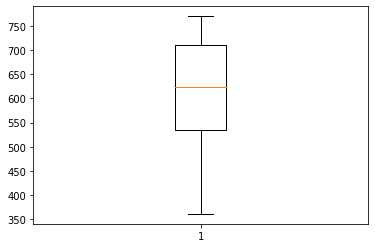

In [8]:
describe(visitors, visitors['visitors'])

- `date` — дата;
- `group` — группа A/B-теста;
- `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста.

Пропусков, дубликатов и выбросов в данных не обнаружено. 

Дату необходимо привести к правильному формату.

p-значение:  0.002020221436396241
Отвергаем нулевую гипотезу: распределение не нормально


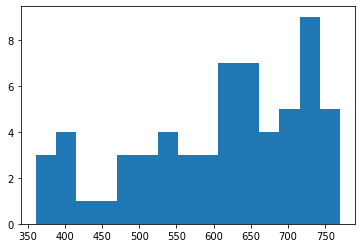

In [9]:
# оценим распределение данных в датасете
alpha = 0.05  

results = st.shapiro(visitors['visitors'])
p_value = results[
    1
]

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально') 

# посмотрим на распределение на графике
plt.hist(visitors['visitors'], bins=15)
plt.show()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


Информация о датафрейме
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None
Количество дубликатов
0
Описание датафрейма
       transactionId     visitorId       revenue
count  1.197000e+03   1.197000e+03  1.197000e+03
mean   2.155621e+09   2.165960e+09  8.348006e+03
std    1.229085e+09   1.236014e+09  3.919113e+04
min    1.062393e+06   5.114589e+06  5.000000e+01
25%    1.166776e+09   1.111826e+09  1.220000e+03
50%    2.145194e+09   2.217985e+09  2.978000e+03
75%    3.237740e+09   3.177606e+09  8.290000e+03
max    4.293856e+09   4.283872e+09  1.294500e+06


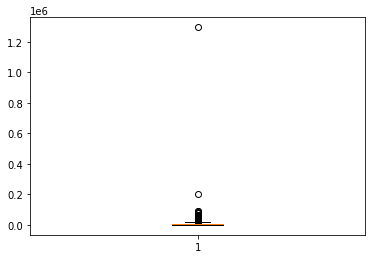

In [10]:
describe(orders, orders['revenue'])

- `transactionId` — идентификатор заказа;
- `visitorId` — идентификатор пользователя, совершившего заказ;
- `date` — дата, когда был совершён заказ;
- `revenue` — выручка заказа;
- `group` — группа A/B-теста, в которую попал заказ.

Пропусков и дубликатов в данных не обнаружено, но на boxplot видны выбросы. При выводе датафрейма также можно заметить выбивающиеся крупные заказы. Будем иметь это в виду при оценке результатов теста.

Дату необходимо привести к правильному формату.

p-значение:  0.0
Отвергаем нулевую гипотезу: распределение не нормально


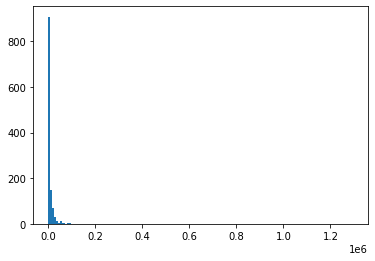

In [11]:
# оценим распределение данных в датасете
alpha = 0.05  # критический уровень статистической значимости

results = st.shapiro(orders['revenue'])
p_value = results[
    1
]  # второе значение в массиве результатов (с индексом 1) - p-value

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально')
    
# посмотрим на распределение на графике
plt.hist(orders['revenue'], bins=150)
plt.show()

In [12]:
# приведем даты к нужному типу
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [13]:
# отберем пользователей по группам
group_A = orders[orders['group'] == 'A']
group_B = orders[orders['group'] == 'B']

# назначим переменную и посчитаем совпадения ID пользователей из группы А с группой В
counter_A = 0

for i in range(len(group_B['visitorId'])):
    if i in group_A['visitorId']:
        counter_A += 1

# аналогично сделаем с группой В
counter_B = 0

for i in range(len(group_A['visitorId'])):
    if i in group_B['visitorId']:
        counter_B += 1

print('В группе А нашлось {0} пользователей, попавших также и в группу В.'.format(counter_A))
print('В группе B нашлось {0} пользователей, попавших также и в группу A.'.format(counter_B))

В группе А нашлось 304 пользователей, попавших также и в группу В.
В группе B нашлось 294 пользователей, попавших также и в группу A.


Пользователей, которые попали в обе группы, необходимо исключить из дальнейшего анализа. Мы не можем очистить от повторов таблицу visitors, так как там агрегированные данные, но исключим таких пользователей из таблицы orders. 

In [14]:
group_A_list = list(group_A['visitorId'])
group_B_list = list(group_B['visitorId'])

# отберем ID пользователей, попавших в оба списка и сформируем новый список
groups = orders.query('visitorId in @group_A_list and visitorId in @group_B_list')
groups_list = list(groups['visitorId'])

# отфильтруем orders по этому списку
orders = orders[~orders['visitorId'].isin(groups_list)]

### Кумулятивная выручка по группам

Построим графики кумулятивных данных, чтобы исключить проблему подсматривания.

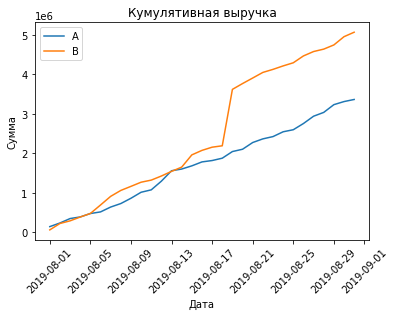

In [15]:
# создадим датафрейм с уникальными парами значений 'date' и 'group' таблицы orders и избавимся от дубликатов
datesGroups = orders[['date', 'group']].drop_duplicates()

# агрегируем значения заказов
ordersAggregated = (
    datesGroups
    .apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
           .agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1)
    .sort_values(by=['date','group'])
)

# агрегируем значения посещений
visitorsAggregated = (
    datesGroups
    .apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
           .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)
    .sort_values(by=['date','group'])
)

# объединим кумулятивные данные в одной таблице и переименуем столбцы
cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)

cumulativeData.columns = [
    'date', 
    'group', 
    'orders', 
    'buyers', 
    'revenue', 
    'visitors'
]

# датафреймы с кумулятивным количеством заказов и кумулятивной выручкой по дням в каждой из групп
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][
    ['date','revenue', 'orders']
]

cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][
    ['date','revenue', 'orders']
]

# график комулятивной выручки по дням и группам А/В-теста
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('Кумулятивная выручка')
plt.ylabel('Сумма')
plt.xlabel('Дата')
plt.xticks(rotation = 45)
plt.legend();

Выручка группы А растет довольно плавно, тогда как выручка группы В имеет резкий скачок 18-го августа. На этот выброс нужно будет посмотреть внимательнее, так как он может исказить общее представление. В целом группа В показывает более хорошие результаты.

### Кумулятивный средний чек по группам

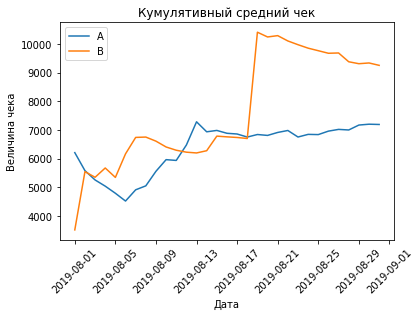

In [16]:
# график среднего чека по группам
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xticks(rotation = 45)
plt.title('Кумулятивный средний чек')
plt.ylabel('Величина чека')
plt.xlabel('Дата')
plt.legend();

Ближе к концу теста средний чек группы А становится более равномерным, тогда как средний чек группы В резко подскакивает 18-го августа, когда, скорее всего, была совершена какая-то крупная покупка, замеченная нами ранее на графике выручки, после чего начинает снижаться. В таком случае группе В нужно больше времени, чтобы прийти к реальному среднему чеку и зафиксироваться, не стоит оценивать достижения группы В по этому графику.

### Относительное изменение кумулятивного среднего чека группы B к группе A

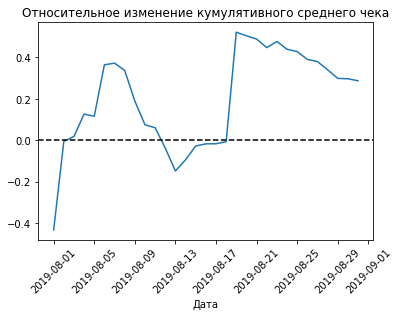

In [17]:
# график относительного различия среднего чека
mergedCumulativeRevenue = cumulativeRevenueA.merge(
    cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B']
)


plt.plot(
    mergedCumulativeRevenue['date'],
    (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1
)

plt.xticks(rotation = 45)
plt.title('Относительное изменение кумулятивного среднего чека')
plt.xlabel('Дата')
plt.axhline(y=0, color='black', linestyle='--'); 

Видим резкие скачки графика, которые опять же сигнализируют о выбросах: была совершена крупная покупка, после которой средний чек группы В начинает падать.

### Кумулятивная конверсия по группам

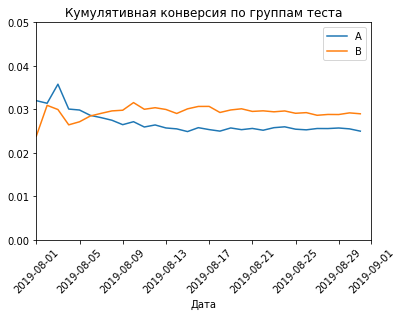

In [18]:
# построим график кумулятивной конверсии
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

cumulativeDataB = cumulativeData[cumulativeData['group']=='B']


plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.xticks(rotation = 45)
plt.title('Кумулятивная конверсия по группам теста')
plt.xlabel('Дата')
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), 0, 0.05]);

К концу теста показатели выравниваются. Конверсия группы В заметно выше, чем у группы А.

### Относительное изменение кумулятивной конверсии группы B к группе A

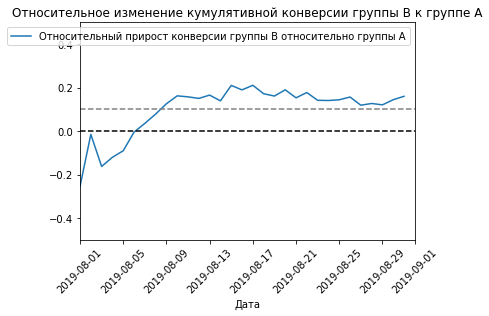

In [19]:
# построим график относительного различия кумулятивных конверсий
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(
    cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B']
)

plt.plot(
    mergedCumulativeConversions['date'], 
    mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, 
    label="Относительный прирост конверсии группы B относительно группы A"
)
plt.legend()
plt.xticks(rotation = 45)
plt.title('Относительное изменение кумулятивной конверсии группы B к группе A')
plt.xlabel('Дата')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), -0.5, 0.5]);

Здесь мы видим примерно ту же картину, что и на графике выше: в начале теста показатели группы В были неустойчивыми, но затем разница с группой А начала расти, достигла пикового значения около 21%, после чего снизилась и зафиксировалась на уровне около 10%.

### Количество заказов по пользователям

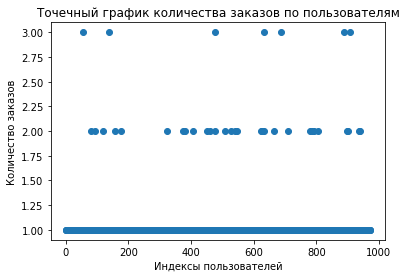

In [20]:
# сформируем сводную таблицу с кол-м заказов на пользователя
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

ordersByUsers.columns = ['userId', 'orders']

# построим точечный график
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Точечный график количества заказов по пользователям')
plt.ylabel('Количество заказов')
plt.xlabel('Индексы пользователей');

В основном пользователи совершают одну покупку, но также довольно много отметок двух и трех покупок. Посмотрим на перцентили.

### 95-й и 99-й перцентили количества заказов на пользователя

In [21]:
# посчитаем 95-й и 99-й перцентили 
np.percentile(ordersByUsers['orders'], [95, 99])

array([1., 2.])

Не более 1% процентов покупаетелей совершает две покупки. В таком случае мы можем взять за нижнюю границу одну покупку.

### Стоимость заказов

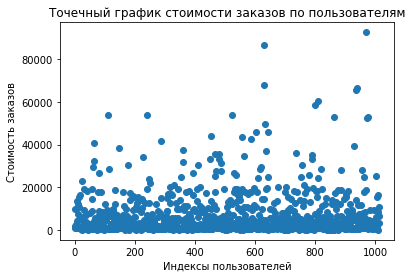

In [22]:
# исключим единичные выбросы
orders_rev_without_anomaly = orders.query('revenue < 200000')

x_values = pd.Series(range(0, len(orders_rev_without_anomaly['revenue'])))
plt.scatter(x_values, orders_rev_without_anomaly['revenue'])
plt.title('Точечный график стоимости заказов по пользователям')
plt.ylabel('Стоимость заказов')
plt.xlabel('Индексы пользователей');

Стоимость заказов обычно невысокая, выбиваются из общей картины заказы на 200 000 руб. и на 1 200 000 руб. Посмотрим на перцентили, чтобы точнее определить нижнюю границу.

### 95-й и 99-й перцентили стоимости заказов

In [23]:
np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

Не более 5% пользователей оформляет покупку на 26 785 руб. Эту сумму мы и возьмем за нижнюю границу.

### Статистическая значимость различий в конверсии между группами по «сырым» данным

Подготовим данные.

In [24]:
# сформируем таблицу посещений группы А
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

# агрегируем значения посещений группы А и переименуем для удобства столбцы 
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

# сформируем таблицу посещений группы В
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

# агрегируем значения посещений группы В и переименуем для удобства столбцы 
visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

# агрегируем значения заказов группы А и переименуем для удобства столбцы 
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

# соберем кумулятивные данные группы А
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

# агрегируем значения заказов группы В и переименуем для удобства столбцы 
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

# соберем кумулятивные данные группы В
ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

# объединим все в единый датафрейм
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


Сформулируем гипотезы. 

**Нулевая:** различий в конверсии между группами нет. 

**Альтернативная:** различия в конверсии между группами есть.

Проведем непараметрический тест Уилкоксона-Манна-Уитни:

In [25]:
# сформируем таблицы с количеством заказов для каждой из групп
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

# создадим выборки с числом заказов определенного пользователя
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('alpha: 0.05')
# применим статистический критерий Манна-Уитни
print("p-value: {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("относительный прирост конверсии группы B: {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

alpha: 0.05
p-value: 0.011
относительный прирост конверсии группы B: 0.160


P-value = 0,011, значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, мы отвергаем. Группа B на 16% опережает группу А.

### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

Сформулируем гипотезы. 

**Нулевая:** различий в среднем чеке между группами нет. 

**Альтернативная:** различия в среднем чеке между группами есть.

In [26]:
print(
    'p-value: {0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                orders['group']=='A'
            ]['revenue'], 
            orders[
                orders['group']=='B'
            ]['revenue'])[1])
)
print(
    'относительный прирост среднего чека группы B: {0:.3f}'.format(
        orders[
            orders['group']=='B'
        ]['revenue'].mean()
        /orders[
            orders['group']=='A'
        ]['revenue'].mean()-1)
)

p-value: 0.829
относительный прирост среднего чека группы B: 0.287


P-value значительно больше 0,05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. При этом средний чек группы B значительно выше среднего чека группы A — почти на 29%.

### Статистическая значимость различий в конверсии между группами по «очищенным» данным

In [27]:
# посчитаем аномальных пользователей
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 1]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 1]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 26785]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

abnormalUsers.shape[0]

86

86 аномальных пользователя. Посмотрим, как их действия повлияли на результаты теста, исключив их из выборки.

Вернемся к нашим гипотезам. 

**Нулевая:** различий в конверсии между группами нет. 

**Альтернативная:** различия в конверсии между группами есть.

In [28]:
# сформируем выборки на группы А и В без аномальных пользователей
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
print('alpha: 0.05')
# применим статистический критерий Манна-Уитни
print('p-value: {0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('относительный прирост конверсии группы B: {0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

alpha: 0.05
p-value: 0.016
относительный прирост конверсии группы B: 0.174


После очистки данных p-value немного подрос, но нулевая гипотеза всё же отвергается, так же как и при проверке "сырых" данных. Группа В стала лидировать на 17,4% в сравнении с показанными ранее 16%.

### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

Вспомним наши гипотезы. 

**Нулевая:** различий в среднем чеке между группами нет. 

**Альтернативная:** различия в среднем чеке между группами есть.

In [29]:
print('alpha: 0.05')
# применим критерий Манна-Уитни к выборке без аномальных пользователей
print(
    'p-value: {0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "относительный прирост среднего чека группы B: {0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

alpha: 0.05
p-value: 0.727
относительный прирост среднего чека группы B: -0.034


P-value еще вырос, значит нулевая гипотеза всё так же не может быть отвергнута, но средний чек группы B стал на 3% меньше, чем у группы А. Когда мы исключили "выбросы", слишком большие чеки исчезли из расчетов и чеки групп выравнялись.

### Выводы

1. По результатам теста мы видим, что различия в конверсии групп заметны и по "сырым", и по "очищенным" данным. Группа В лидирует по этому показателю в обеих выборках — на 16% по "сырым" и 17,4% по "очищенным" данным.


2. По "сырым" данным различия в среднем чеке в пользу группы В — она опережает группу А почти на 29%, но после очистки от выбросов средний чек группы В стал на 3% ниже, чем у группы А.

Мы можем сделать вывод, что несмотря на невысокий средний чек, группа В побеждает группу А по конверсии — меньший чек будет окуплен большим количеством покупателей.

Таким образом, тест можно останавливать и зафиксировать победу группы В.

## Вывод

1. Была проведена приоритизация гипотез с помощью фреймворков ICE и RICE, в результате, с учетом всех факторов, выявлены наиболее подходящие для тестирования гипотезы:

- добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок;

- добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей.

2. При проверке групп тестирования были выявлены пользователи, попавшие в обе группы. Данные о таких пользователях были удалены из обеих групп.


3. По результатам проведенного тестирования группа В показала лучшие результаты, несмотря на снижение среднего чека при тесте "очищенных" данных — высокая конверсия группы перекрывает этот недостаток.

Тест признаем успешным и фиксируем победу группы В, а значит изменения можно раскатывать на всю аудиторию магазина.